# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [48]:
# 計算並繪製輪廓分析的結果
s_score = []
labels = []
for i in range(2,9):
    cluster = KMeans(n_clusters=i)
    cluster.fit(X)
    s_score.append(silhouette_score(X, cluster.labels_))
    labels.append(cluster.labels_)

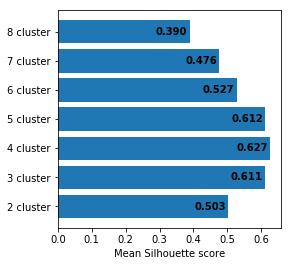

In [47]:
y_label = ["{} cluster".format(i) for i in range(1,9)]
fig, axe = plt.subplots(figsize=(4,4))
axe.barh(y=range(7) ,width=s_score)

axe.set_yticklabels(y_label)
axe.set_xlabel("Mean Silhouette score")

for i, v in enumerate(s_score):
    axe.text(v-0.1, i-0.1 , "{0:.3f}".format(v), color='black', fontweight='bold')

plt.show()

In [49]:
import seaborn as sns

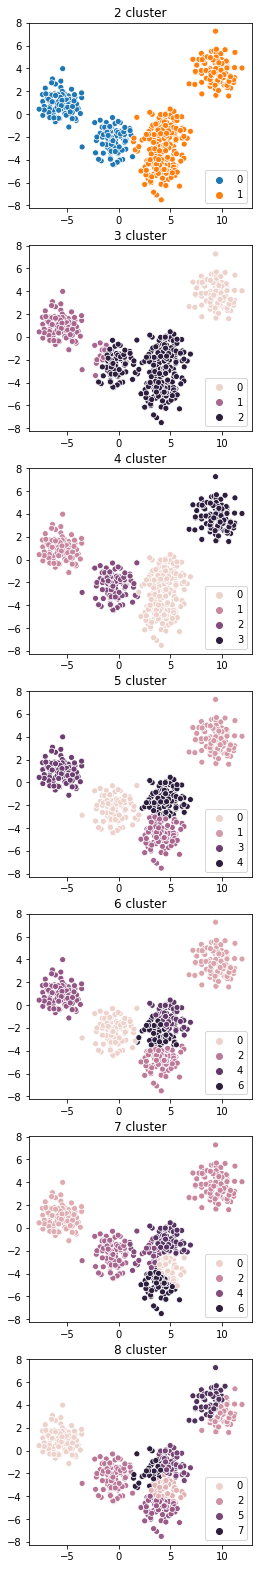

In [62]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(4,28))
for i, axe in enumerate(axes):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels[i], ax=axe)
    axe.legend(loc=4)
    axe.set_title("{} cluster".format(i+2))
plt.show()

雖然產生五個group，但其中兩個連載一起